http://cv-tricks.com/tensorflow-tutorial/understanding-alexnet-resnet-squeezenetand-running-on-tensorflow/

In [1]:
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
downscale = 8
naosei = cv.imread('../bagunca/DeepLearning-DataScience/data/esperanca.png', 0)
dimensions = (int(naosei.shape[1]/downscale), int(naosei.shape[0]/downscale))
naosei = cv.resize(naosei, dimensions)

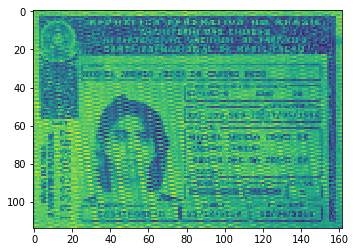

In [3]:
%matplotlib inline
plt.imshow(naosei)

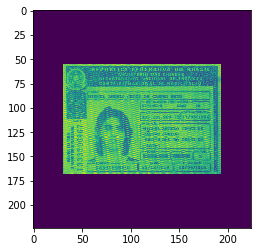

In [4]:
pad_to_224_x = int((224 - naosei.shape[0])/2)
pad_to_224_y = int((224 - naosei.shape[1])/2)
naosei = np.pad(naosei, ((pad_to_224_x, pad_to_224_x), (pad_to_224_y, pad_to_224_y)), 'constant', constant_values=(0, 0))
plt.imshow(naosei)

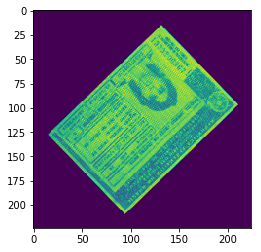

In [5]:
def img_rotate(img, angle):
    num_rows, num_cols = img.shape[:2]
    rotation_matrix = cv.getRotationMatrix2D((num_cols/2, num_rows/2), angle, 1)
    img_rotation = cv.warpAffine(img, rotation_matrix, (num_cols, num_rows))
    return img_rotation

modacaralha = img_rotate(naosei, int(random.random()*360))
plt.imshow(modacaralha)

In [6]:
def create_batch(img, size):
    batch_x, batch_y = [], []
    for i in range(size):
        rotation_val = random.random()
        rotated_img = img_rotate(naosei, int(rotation_val*360))
        batch_x.append(rotated_img.ravel())
        batch_y.append([rotation_val])
    return batch_x, batch_y

In [11]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.nn.relu(tf.matmul(input_layer, W) + b)

In [12]:
from tensorflow.contrib import slim

In [13]:
COLOR_CHANNELS = 1
data_ph = tf.placeholder(tf.float32, shape=[None, COLOR_CHANNELS*224**2])
output_ph = tf.placeholder(tf.float32, shape=[None, 1])
learning_rate = tf.placeholder('float', [])

In [28]:
def alexNet_convolutions(x_image):
    hl = tf.layers.batch_normalization(slim.conv2d(x_image, 32, [11,11], stride=4))
    print(hl.shape)
    hl = slim.max_pool2d(hl, [3,3], stride=2)
    print(hl.shape)
    hl = tf.layers.batch_normalization(slim.conv2d(hl, 86, [5,5]))
    print(hl.shape)
    hl = slim.max_pool2d(hl, [3,3], stride=2)
    print(hl.shape)
    hl = tf.layers.batch_normalization(slim.conv2d(hl, 128, [3, 3]))
    print(hl.shape)
    hl = tf.layers.batch_normalization(slim.conv2d(hl, 128, [3, 3]))
    print(hl.shape)
    hl = tf.layers.batch_normalization(slim.conv2d(hl, 86, [3, 3]))
    print(hl.shape)
    hl = slim.max_pool2d(hl, [3,3], stride=2)
    print(hl.shape)
    
    return hl

In [29]:
x_image = tf.reshape(tf.layers.batch_normalization(data_ph), [-1, 224, 224, COLOR_CHANNELS])
hl = alexNet_convolutions(x_image)
hl = slim.flatten(tf.sigmoid(hl))
print(hl.shape)

(?, 56, 56, 32)
(?, 27, 27, 32)
(?, 27, 27, 86)
(?, 13, 13, 86)
(?, 13, 13, 128)
(?, 13, 13, 128)
(?, 13, 13, 86)
(?, 6, 6, 86)
(?, 3096)


In [30]:
fc = slim.stack(hl, slim.fully_connected, [3096, 1569, 564, 84, 1])
print(fc.shape)

(?, 1)


In [31]:
loss = tf.reduce_mean((fc - output_ph)**2)
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [35]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

<IPython.core.display.Javascript object>


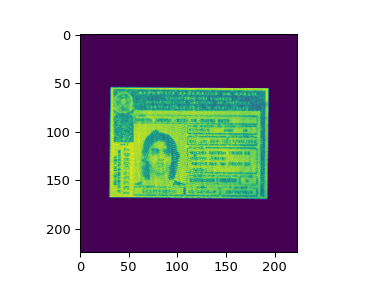

0.172732
[[ 0.30245414]]
0.0506698
[[ 0.45264828]]
0.0659716
[[ 0.52365881]]
0.0384278
[[ 0.56549233]]
0.192591
[[ 0.57756543]]
0.17284
[[ 0.57201064]]
0.154754
[[ 0.56531066]]
0.0882348
[[ 0.58028626]]
0.113753
[[ 0.5602873]]
0.018517
[[ 0.55296111]]
0.0716767
[[ 0.55175453]]
0.142376
[[ 0.55950254]]
0.0448645
[[ 0.54890859]]
0.110611
[[ 0.55379361]]
0.110386
[[ 0.54543507]]
0.108643
[[ 0.55158395]]
0.124069
[[ 0.54200095]]
0.093181
[[ 0.54939753]]
0.126907
[[ 0.54737049]]
0.0451969
[[ 0.51907194]]
0.0207033
[[ 0.50953388]]
0.0960933
[[ 0.50830317]]
0.0477345
[[ 0.50330669]]
0.04901
[[ 0.53103018]]
0.0513292
[[ 0.52445018]]
0.0490052
[[ 0.5334186]]
0.0439172
[[ 0.53687614]]
0.0371396
[[ 0.50961703]]
0.0839398
[[ 0.52694404]]
0.0783915
[[ 0.50695443]]
0.0591001
[[ 0.51506019]]
0.0376662
[[ 0.51409692]]
0.0424982
[[ 0.51696044]]
0.0154277
[[ 0.51309681]]
0.0945306
[[ 0.51619899]]
0.0699117
[[ 0.51549166]]
0.0493725
[[ 0.51633918]]
0.0854145
[[ 0.50633341]]
0.0468426
[[ 0.50351071]]
0.06

0.0209363
[[ 0.52146149]]
0.0196673
[[ 0.52646619]]
0.0305231
[[ 0.52449316]]
0.011207
[[ 0.52507818]]
0.0422113
[[ 0.54054016]]
0.0114972
[[ 0.5289762]]
0.0147054
[[ 0.52222323]]
0.0141159
[[ 0.51468331]]
0.0179386
[[ 0.53464961]]
0.0113443
[[ 0.53363967]]
0.00736749
[[ 0.54116338]]
0.00698567
[[ 0.52072388]]
0.00818334
[[ 0.5353753]]
0.0178323
[[ 0.52150345]]
0.0101879
[[ 0.51396567]]
0.0153301
[[ 0.52363312]]
0.0157535
[[ 0.53627276]]
0.0284786
[[ 0.52255696]]
0.00580052
[[ 0.52872652]]
0.0180311
[[ 0.51630312]]
0.0169341
[[ 0.51523918]]
0.0182713
[[ 0.5297367]]
0.0142232
[[ 0.5287903]]
0.015228
[[ 0.53025609]]
0.0138921
[[ 0.52290213]]
0.0113641
[[ 0.52939218]]
0.0191202
[[ 0.50682867]]
0.0207518
[[ 0.53045958]]
0.0146412
[[ 0.5279882]]
0.0261266
[[ 0.52553874]]
0.0114117
[[ 0.53440058]]
0.0191209
[[ 0.5351634]]
0.00760916
[[ 0.52813959]]
0.00541284
[[ 0.54871529]]
0.00617453
[[ 0.53758943]]
0.00693144
[[ 0.54507005]]
0.0210475
[[ 0.5346629]]
0.0247528
[[ 0.50845051]]
0.0108935
[[ 

0.00186331
[[ 0.61843789]]
0.00283823
[[ 0.62455237]]
0.00400473
[[ 0.61146843]]
0.00197139
[[ 0.61994839]]
0.00147376
[[ 0.6140725]]
0.00686932
[[ 0.60702217]]
0.00265545
[[ 0.62042832]]
0.00408283
[[ 0.61185282]]
0.00249628
[[ 0.61300826]]
0.00349905
[[ 0.61836392]]
0.00200922
[[ 0.62884432]]
0.000311178
[[ 0.6166991]]
0.0154512
[[ 0.62026423]]
0.00120007
[[ 0.62074196]]
0.00213347
[[ 0.61669552]]
0.0214555
[[ 0.61623162]]
0.00375035
[[ 0.62169921]]
0.00461785
[[ 0.61468065]]
0.0151913
[[ 0.61955011]]
0.00364527
[[ 0.62333041]]
0.0274731
[[ 0.63359618]]
0.00157615
[[ 0.61938232]]
0.00100529
[[ 0.61778903]]
0.0129215
[[ 0.61839831]]
0.00260903
[[ 0.61553174]]
0.00195163
[[ 0.62140578]]
0.00467293
[[ 0.62700629]]
0.000907591
[[ 0.62242681]]
0.00335873
[[ 0.63347781]]
0.00213989
[[ 0.63107342]]
0.00321928
[[ 0.61464381]]
0.00371811
[[ 0.62090206]]
0.00286937
[[ 0.63382095]]
0.00822043
[[ 0.63513494]]
0.000927155
[[ 0.61492592]]
0.00258984
[[ 0.62370807]]
0.0156964
[[ 0.63434654]]
0.0091

0.00165663
[[ 0.65600574]]
0.000182878
[[ 0.6506716]]
0.000630148
[[ 0.65324372]]
0.00031163
[[ 0.65140885]]
0.000131437
[[ 0.65483952]]
0.00292039
[[ 0.65820938]]
0.000141402
[[ 0.65829557]]
0.00137333
[[ 0.65040171]]
0.000401175
[[ 0.65525591]]
0.00480029
[[ 0.65451741]]
0.000412012
[[ 0.65592241]]
0.000253162
[[ 0.65187466]]
9.12861e-05
[[ 0.65574038]]
0.000548278
[[ 0.65776652]]
0.000697298
[[ 0.65655041]]
0.00261619
[[ 0.66184503]]
0.000801785
[[ 0.64484102]]
0.00103763
[[ 0.64983237]]
0.00155148
[[ 0.65384781]]
0.000304622
[[ 0.64672059]]
0.00028968
[[ 0.65875155]]
0.000956518
[[ 0.64973044]]
0.00280996
[[ 0.65515518]]
0.000382623
[[ 0.65578872]]
0.000347188
[[ 0.6572091]]
0.0180599
[[ 0.6562143]]
0.000147947
[[ 0.64388001]]
0.00150071
[[ 0.65305245]]
0.000848072
[[ 0.65736711]]
0.00035815
[[ 0.65364504]]
0.00019933
[[ 0.64593327]]
0.000585389
[[ 0.65128088]]
0.00022817
[[ 0.65153372]]
0.000161705
[[ 0.65882546]]
0.00104135
[[ 0.65358448]]
4.44617e-05
[[ 0.65964746]]
0.000630855


0.000156298
[[ 0.6489504]]
0.000273578
[[ 0.65560538]]
0.000127493
[[ 0.64567608]]
0.000112038
[[ 0.64577299]]
4.50017e-05
[[ 0.6493172]]
0.000106004
[[ 0.64469141]]
0.000126613
[[ 0.65000683]]
3.33195e-05
[[ 0.64172435]]
0.000147428
[[ 0.64269626]]
0.000532331
[[ 0.65304017]]
0.000146781
[[ 0.64777362]]
0.000512022
[[ 0.65193027]]
0.000366595
[[ 0.65161443]]
0.00049844
[[ 0.6462943]]
8.10504e-05
[[ 0.64592534]]
0.000228113
[[ 0.64678085]]
0.000272021
[[ 0.64850181]]
0.00033626
[[ 0.64531171]]
0.000182868
[[ 0.64541215]]
0.000958122
[[ 0.64602619]]
0.000103335
[[ 0.64618832]]
0.000260918
[[ 0.64675575]]
0.000381284
[[ 0.64364874]]
8.02442e-05
[[ 0.64478081]]
0.000112591
[[ 0.6567443]]
3.84508e-05
[[ 0.64859223]]
0.000130402
[[ 0.64050627]]
0.000486507
[[ 0.65132731]]
0.000169015
[[ 0.64141321]]
2.91282e-05
[[ 0.64437068]]
0.000694666
[[ 0.64134526]]
0.000663961
[[ 0.64569151]]
2.07878e-05
[[ 0.6426118]]
5.72225e-05
[[ 0.64658165]]
7.84207e-06
[[ 0.64315671]]
0.00015615
[[ 0.64588177]]


4.4335e-05
[[ 0.63914758]]
5.07599e-06
[[ 0.63791549]]
2.21832e-05
[[ 0.63715476]]
1.02804e-05
[[ 0.63652986]]
1.29232e-05
[[ 0.63981074]]
6.49574e-05
[[ 0.63211435]]
1.67919e-05
[[ 0.63748574]]
4.63232e-06
[[ 0.63491118]]
1.38446e-05
[[ 0.63623637]]
4.16661e-05
[[ 0.63729405]]
1.59138e-05
[[ 0.63486379]]
8.10146e-06
[[ 0.6335206]]
3.62862e-05
[[ 0.63260353]]
5.4258e-05
[[ 0.63756269]]
9.76391e-06
[[ 0.63778424]]
7.71245e-06
[[ 0.63463712]]
1.50388e-05
[[ 0.63906598]]
3.94795e-05
[[ 0.63787472]]
2.93082e-06
[[ 0.63415164]]
6.10204e-05
[[ 0.63655972]]
4.62655e-05
[[ 0.636406]]
1.56719e-05
[[ 0.63625997]]
6.93755e-06
[[ 0.63697052]]
4.82543e-05
[[ 0.63239467]]
1.91883e-05
[[ 0.63321054]]
2.4966e-05
[[ 0.63198179]]
7.14492e-06
[[ 0.63242257]]
1.92699e-05
[[ 0.63522601]]
1.91482e-05
[[ 0.63263345]]
1.08365e-05
[[ 0.63520867]]
1.52136e-05
[[ 0.63295317]]
4.64444e-05
[[ 0.62999833]]
3.1032e-05
[[ 0.63080686]]
3.66406e-06
[[ 0.63285261]]
2.83168e-05
[[ 0.63058579]]
1.27882e-05
[[ 0.63313746]]

4.38199e-06
[[ 0.62432963]]
1.16454e-06
[[ 0.6247952]]
1.55453e-06
[[ 0.62451547]]
3.60845e-07
[[ 0.62413317]]
6.56763e-07
[[ 0.62396312]]
6.91114e-07
[[ 0.62484699]]
9.5942e-07
[[ 0.62493116]]
1.91039e-06
[[ 0.62449503]]
2.05095e-06
[[ 0.62292999]]
1.50996e-06
[[ 0.62429547]]
5.92794e-07
[[ 0.62428349]]
2.14228e-06
[[ 0.62308317]]
1.79221e-06
[[ 0.62640423]]
1.06814e-06
[[ 0.62430716]]
5.33775e-07
[[ 0.62370759]]
1.85732e-06
[[ 0.62612909]]
7.97213e-08
[[ 0.62509137]]
2.71619e-07
[[ 0.62549108]]
7.21995e-07
[[ 0.62622887]]
8.2162e-08
[[ 0.62369752]]
7.31024e-07
[[ 0.62457281]]
1.74156e-06
[[ 0.62455189]]
1.46115e-06
[[ 0.62513149]]
8.67746e-07
[[ 0.62481165]]
1.25987e-06
[[ 0.6253556]]
5.16753e-06
[[ 0.62594783]]
1.25125e-06
[[ 0.62387645]]
1.54524e-06
[[ 0.62536889]]
2.45442e-06
[[ 0.62355506]]
1.11938e-06
[[ 0.62465042]]
2.47854e-07
[[ 0.62379342]]
3.49052e-07
[[ 0.62330252]]
2.02114e-07
[[ 0.62507677]]
6.65342e-07
[[ 0.62390119]]
1.74287e-06
[[ 0.62428111]]
1.3885e-06
[[ 0.62303406

In [40]:
%matplotlib notebook
import time

batch_size = 3
steps = 200000
rate = 3e-8

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        batch_x, batch_y = create_batch(naosei, batch_size)
        feed = {data_ph:batch_x, output_ph:batch_y, learning_rate:rate}
        sess.run(train, feed_dict=feed)
        
        if i%100 == 0:
            last_loss = sess.run(loss, feed_dict = feed)
            print(last_loss)
            pred = sess.run(fc, feed_dict={data_ph:[modacaralha.ravel()]})
            print(pred)
            ax.clear()
            ax.imshow(img_rotate(modacaralha, -360*pred))
            fig.canvas.draw()
    test_batch, _ = create_batch(naosei, 10)
    final_pred = sess.run(fc, feed_dict={data_ph:test_batch})

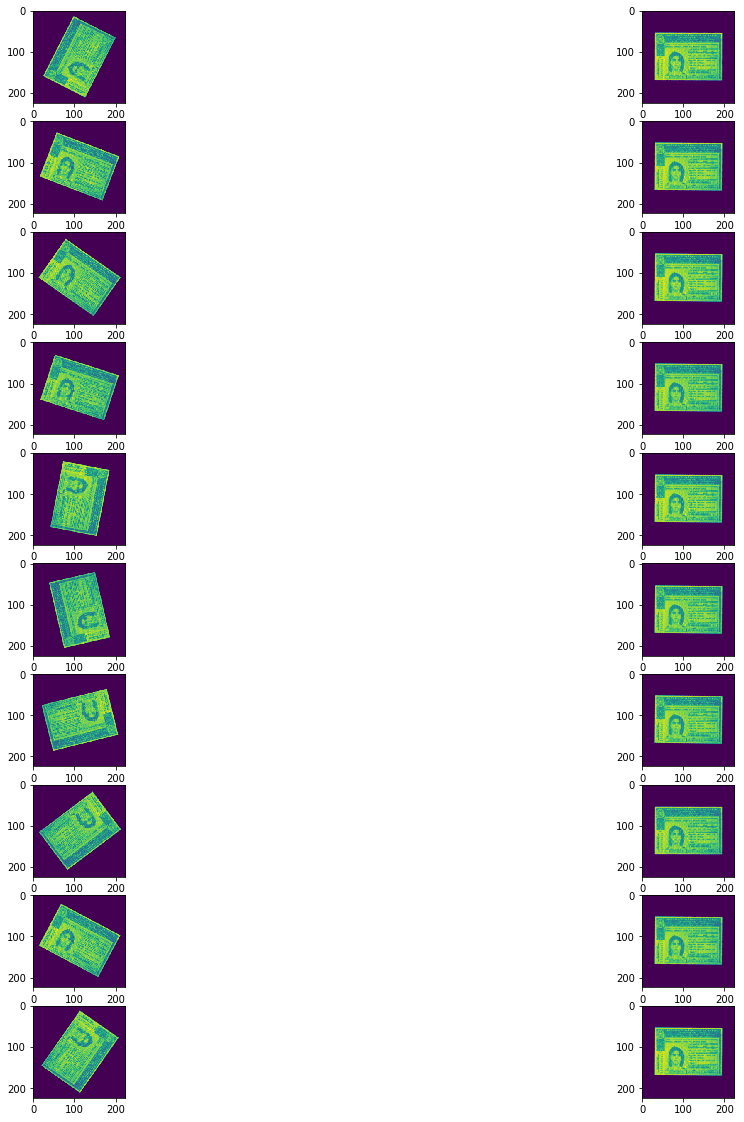

In [41]:
%matplotlib inline
plots = []
fig = plt.figure(figsize=(20,20))
__=0
for i in range(len(final_pred)):
    plots.append(fig.add_subplot(10, 2, __+1))
    plots[__].imshow(test_batch[i].reshape(224,224))
    plots.append(fig.add_subplot(10, 2, __+2))
    plots[__+1].imshow(img_rotate(test_batch[i].reshape(224, 224), -360*final_pred[i]))
    __ += 2
    